> # Multiple Linear Regression

In this notebook, i well predect the price of the house using the Linear Regression model. `without use` any machine learning library.

## 1- Package

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import ipympl
import pandas as pd

from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

# %matplotlib widget
%matplotlib inline

## 2- import data

In [3]:
path = './data/Housing.csv'

data = pd.read_csv(path)

data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
furnishingstatus_map = {
    'furnished' :3,
    'semi-furnished' :2,
    'unfurnished' : 1 
}
boolian_map = {
    'yes':1,
    'no' :0
}

data['furnishingstatus'] = data['furnishingstatus'].map(furnishingstatus_map)
data['mainroad']  =  data['mainroad'].map(boolian_map)
data['guestroom'] = data['guestroom'].map(boolian_map)
data['basement']  =  data['basement'].map(boolian_map)
data['hotwaterheating']  =  data['hotwaterheating'].map(boolian_map)
data['airconditioning'] = data['airconditioning'].map(boolian_map)
data['prefarea']  =  data['prefarea'].map(boolian_map)

x_train = data.values[:,1:]
y_train = data["price"].values

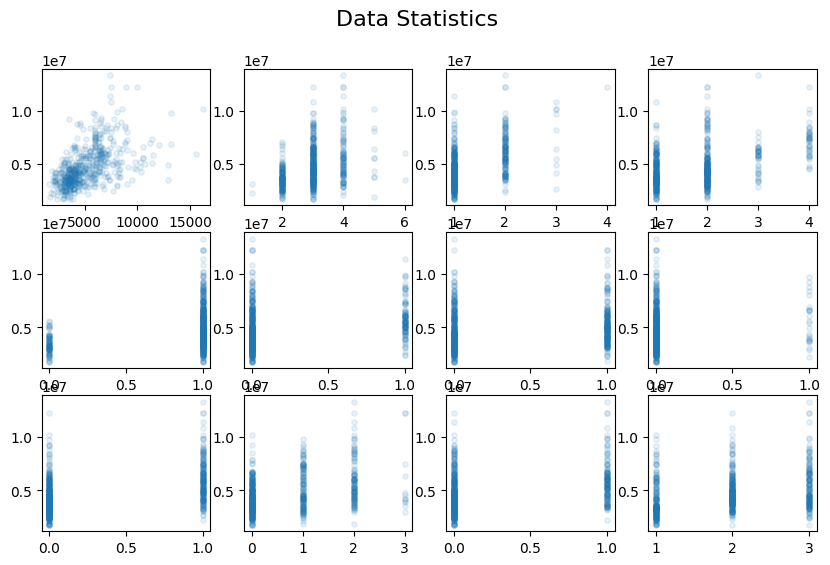

In [5]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Data Statistics', fontsize=16)
 
for i in range(1,13):
    ax = fig.add_subplot(3,4,i)
    ax.scatter(data.iloc[:,i],data['price'], alpha=0.1 ,s=15, label='Price vs '+data.columns[i])


## Scale/normalize the training data

In [6]:
# z = (x - u) / s ==> StandardScaler()

scaler = StandardScaler()
X_norm = scaler.fit_transform(x_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[14550     5     3     3     1     1     1     1     1     3     1     2]
Peak to Peak range by column in Normalized X:[6.71079293 6.78070523 5.97599535 3.46142038 2.87096708 2.61439755
 2.09593682 4.77996621 2.15168089 3.48515059 2.35897582 2.62924776]


## Create and fit the regression model

In [7]:
sgdr = SGDRegressor(max_iter=1000,learning_rate='optimal',alpha=0.2)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(alpha=0.2, learning_rate='optimal')
number of iterations completed: 24, number of weight updates: 13081.0


## polinomial regression

In [34]:
pl = PolynomialFeatures(degree=2)
X_poly = pl.fit_transform(X_norm)
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")
print(f"Peak to Peak range by column in Polynomial X:{np.ptp(X_poly,axis=0)}")


Peak to Peak range by column in Normalized X:[6.71079293 6.78070523 5.97599535 3.46142038 2.87096708 2.61439755
 2.09593682 4.77996621 2.15168089 3.48515059 2.35897582 2.62924776]
Peak to Peak range by column in Polynomial X:[ 0.          6.71079293  6.78070523  5.97599535  3.46142038  2.87096708
  2.61439755  2.09593682  4.77996621  2.15168089  3.48515059  2.35897582
  2.62924776 25.97189842 18.92272274 21.39782697  8.97475747  6.56546043
  8.45003236  8.79772264 23.66437477 10.55800896 11.42083307  9.5245212
 11.45350512 16.93676318 11.76733369  7.11734432 13.3734179   8.74337802
  6.78000319 18.55486432  6.85859804  7.69514315  7.34326427 10.82119883
 28.8976541  16.86041944 10.6089368   9.85196334  8.61833167 18.16982142
 10.27888351 17.23502186  9.15673193 11.77707179  6.36078417  5.68906179
  7.43887885  5.30696173 10.5243372   5.44810704  9.27456213  6.24766002
  6.65731768  5.91339216  6.44538987  5.16720571 13.09362446  5.30463403
  5.72806389  5.81568739  6.48200075  4.402038

In [37]:
poly_weights = np.zeros(X_poly.shape[1])
poly_bais = 0
sgdr_poly = SGDRegressor(max_iter=1000,learning_rate='optimal',alpha=0.2)
poly_r = sgdr_poly.fit(X_poly, y_train)
print(sgdr_poly)
print(f"number of iterations completed: {sgdr_poly.n_iter_}, number of weight updates: {sgdr_poly.t_}")


SGDRegressor(alpha=0.2, learning_rate='optimal')
number of iterations completed: 1000, number of weight updates: 545001.0


c:\Users\Ali.DE_Bouakaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


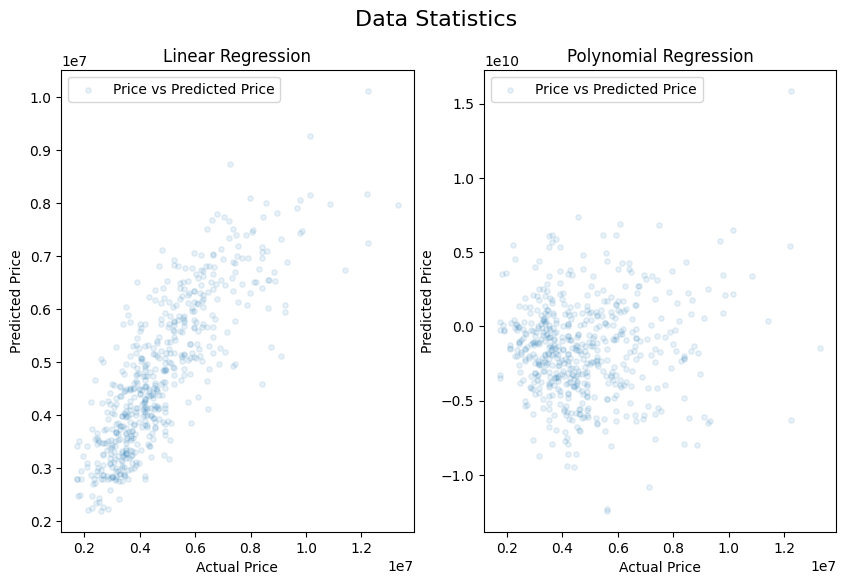

In [36]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Data Statistics', fontsize=16)

ax = fig.add_subplot(1,2,1)
ax.scatter(y_train,sgdr.predict(X_norm), alpha=0.1 ,s=15, label='Price vs Predicted Price')
ax.set_xlabel('Actual Price')
ax.set_ylabel('Predicted Price')
ax.set_title('Linear Regression')
ax.legend()

ax = fig.add_subplot(1,2,2)
ax.scatter(y_train,sgdr_poly.predict(X_poly), alpha=0.1 ,s=15, label='Price vs Predicted Price')
ax.set_xlabel('Actual Price')
ax.set_ylabel('Predicted Price')
ax.set_title('Polynomial Regression')
ax.legend()

plt.show()

In [ ]:
# accuracy of polynomial regression is better than linear regression
# polynomial regression is overfitting the data
score = sgdr.score(poly_r,y_train)

In [9]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters: \033[91mw:\033[0m {w_norm}, \033[91mb:\033[0m{b_norm}")

model parameters: w: [462456.34568171 130278.71720977 439903.31571622 339194.19387762
 156271.03202527 124905.37939825 142970.3847758  147830.43683248
 359956.89184438 237042.0809073  250221.35143576 162845.41168563], b:[4767110.18492897]


In [11]:
y_pred = np.dot(X_norm, w_norm) + b_norm   #! the same of sgdr.predict(X_norm)

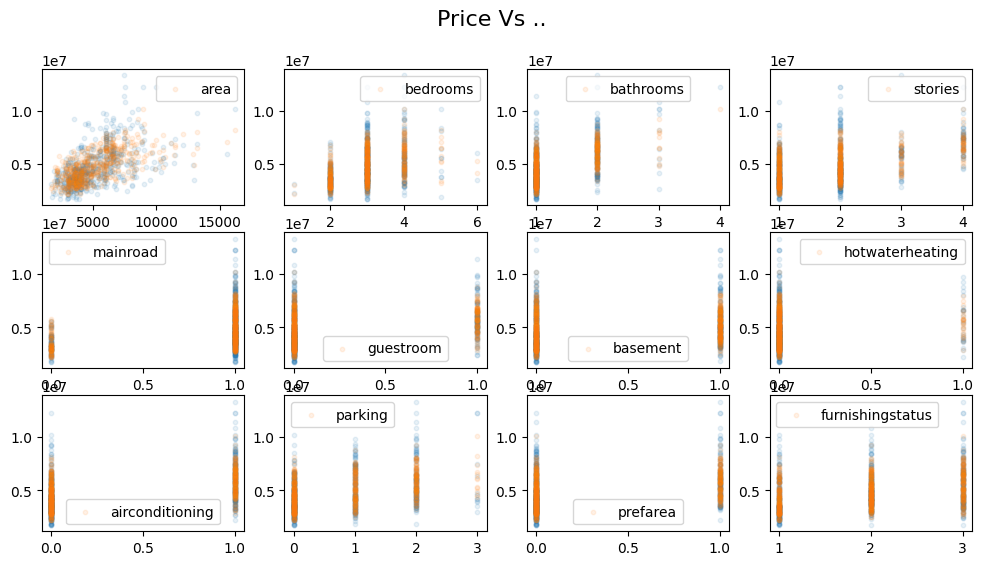

In [12]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Price Vs ..', fontsize=16)

for i in range(1,13):
    ax = fig.add_subplot(3,4,i)
    ax.scatter(data.iloc[:,i],data['price'], alpha=0.1 ,s=10)
    ax.scatter(data.iloc[:,i],y_pred, alpha=0.1 ,s=10, label=data.columns[i])
    ax.legend()

In [27]:
sgdr.score(X_norm, y_train)

0.6749275357492467